In [37]:
import pandas as pd
import os
import mplcursors
import pprint
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv(os.path.join("data", "bt_symmetric.csv"))

In [39]:
df = df[df["user_b"] != -1]

time_max = df["# timestamp"].max()
times = []
connections = []
for i in range(0, time_max, 300):
    df_temp = df[df["# timestamp"] == i]
    if len(df_temp) > 250:
        times.append(i)
        connections.append(len(df_temp))
    else:
        times.append(-1)
        connections.append(-1)
    

In [40]:
users = set(df["user_a"]) | set(df["user_b"])
connections_counter = dict([[x,[]] for x in users])
connections_counter_fin = dict([[x,[]] for x in users])

for i in range(0, time_max, 300):
    if i not in times:
        continue
    
    for key, value in connections_counter.items():
        connections_counter[key].append(0)
    
    if i in times:
        df_temp = df[df["# timestamp"] == i]
        for _, row in df_temp.iterrows():
            connections_counter[row["user_a"]][-1] += 1
            connections_counter[row["user_b"]][-1] += 1

for key, value in connections_counter.items():
        connections_counter_fin[key] = np.mean(value)



                           
        
    

In [41]:
for key, value in connections_counter.items():
        connections_counter_fin[key] = np.sum(value)

2925.286495829231 7628.415631830343


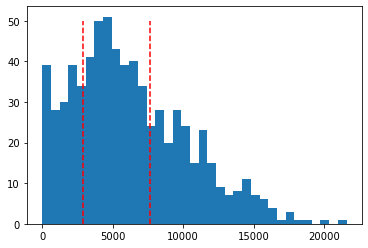

In [42]:
connections_counter_fin.pop(-2)
plt.hist(list(connections_counter_fin.values()), bins = 35)
mean = np.mean(list(connections_counter_fin.values()))
std = np.std(list(connections_counter_fin.values()))
#plt.vlines(mean, 0, 50, color= "red")
plt.vlines(mean+std-2700, 0, 50, color= "red", linestyles="dashed")
plt.vlines(mean-std+800, 0, 50, color= "red", linestyles="dashed" )

print(mean-std+800, mean+std-2700)
plt.show() 

In [43]:
low = []
med = []
high = []
for key in connections_counter_fin.keys():
    if connections_counter_fin[key] < 2900:
        low.append(key)
    elif connections_counter_fin[key] < 7600:
        med.append(key)
    else:
        high.append(key)

print(low,"\n",med,"\n",high)

[2, 7, 9, 21, 24, 26, 28, 33, 40, 43, 45, 59, 60, 66, 68, 71, 77, 82, 86, 89, 103, 110, 117, 124, 125, 126, 131, 135, 141, 143, 150, 160, 161, 171, 184, 202, 212, 213, 214, 219, 226, 234, 241, 245, 255, 256, 258, 270, 293, 298, 312, 313, 316, 320, 329, 332, 337, 340, 346, 347, 362, 370, 377, 381, 385, 387, 392, 393, 398, 400, 410, 417, 420, 426, 440, 442, 445, 446, 447, 451, 454, 456, 460, 463, 464, 471, 477, 495, 496, 497, 500, 510, 511, 516, 517, 526, 533, 548, 562, 565, 566, 570, 573, 574, 577, 579, 590, 592, 594, 601, 602, 603, 604, 605, 606, 618, 620, 622, 624, 625, 626, 628, 629, 631, 635, 638, 639, 641, 642, 647, 652, 653, 654, 660, 669, 670, 674, 675, 679, 680, 681, 690, 692, 694, 695, 696, 697, 698, 699, 703, 704, 705, 707, 709, 710, 711, 732, 812, 845] 
 [1, 3, 4, 8, 10, 11, 16, 17, 18, 19, 20, 23, 27, 30, 31, 32, 35, 36, 37, 38, 39, 46, 47, 51, 53, 55, 56, 62, 63, 67, 70, 73, 74, 75, 76, 80, 83, 84, 85, 87, 91, 93, 96, 98, 101, 102, 104, 106, 107, 108, 109, 111, 112, 113, 11

In [61]:
data_low = {"user": low, "label": 0}
data_med = {"user": med, "label": 1}
data_high = {"user": high, "label": 2}

df_low = pd.DataFrame(data_low)
df_med = pd.DataFrame(data_med)
df_high = pd.DataFrame(data_high)

df_labels = pd.concat([df_low, df_med, df_high], axis=0) 
df_labels = df_labels.set_index("user")

df_labels = df_labels.sort_index()
df_labels.head(100)

df_labels.to_csv("labels.csv")